In [1]:
import nibabel as nib

# Load a NIfTI file
nifti_file = nib.load('liver_0.nii')

# Access the image data as a NumPy array
image_data = nifti_file.get_fdata()

# Print some basic information about the image
print(f'Shape of the image data: {image_data.shape}')
print(f'Affine transformation matrix:\n{nifti_file.affine}')

# Perform some processing on the image data (example: thresholding)
thresholded_data = image_data > 100

# Create a new NIfTI image from the processed data
new_nifti_file = nib.Nifti1Image(thresholded_data.astype(float), nifti_file.affine)

# Save the new image to disk
nib.save(new_nifti_file, 'path_to_new_file.nii')


Shape of the image data: (512, 512, 75)
Affine transformation matrix:
[[   0.703125     0.           0.        -186.3968811]
 [   0.           0.703125     0.        -179.296875 ]
 [   0.           0.           5.        -368.       ]
 [   0.           0.           0.           1.       ]]


Shape of the image data: (512, 512, 75)
Affine transformation matrix:
[[   0.703125     0.           0.        -186.3968811]
 [   0.           0.703125     0.        -179.296875 ]
 [   0.           0.           5.        -368.       ]
 [   0.           0.           0.           1.       ]]


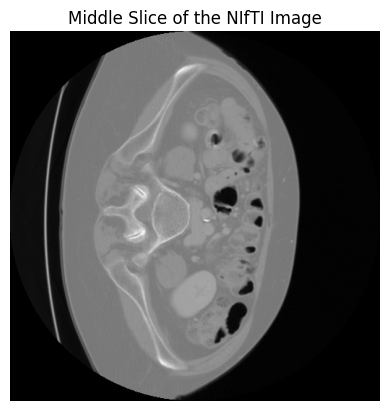

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load a NIfTI file
nifti_file = nib.load('liver_0.nii')

# Access the image data as a NumPy array
image_data = nifti_file.get_fdata()

# Print some basic information about the image
print(f'Shape of the image data: {image_data.shape}')
print(f'Affine transformation matrix:\n{nifti_file.affine}')

# Plotting a slice of the image data
slice_index = image_data.shape[2] // 2  # Take a slice from the middle of the volume
plt.imshow(image_data[:, :, slice_index], cmap='gray')
plt.title('Middle Slice of the NIfTI Image')
plt.axis('off')
plt.show()

# Perform some processing on the image data (example: thresholding)
thresholded_data = image_data > 100

# Create a new NIfTI image from the processed data
new_nifti_file = nib.Nifti1Image(thresholded_data.astype(float), nifti_file.affine)

# Save the new image to disk
nib.save(new_nifti_file, 'path_to_new_file.nii')


Shape of the image data: (512, 512, 75)
Affine transformation matrix:
[[   0.703125     0.           0.        -186.3968811]
 [   0.           0.703125     0.        -179.296875 ]
 [   0.           0.           5.        -368.       ]
 [   0.           0.           0.           1.       ]]
Number of lesions detected: 296


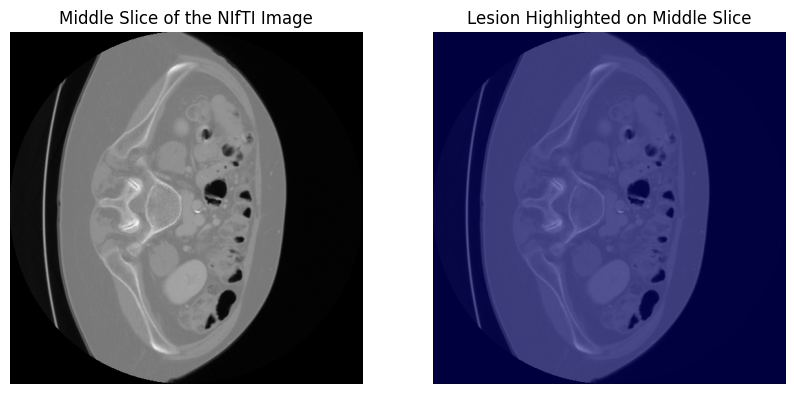

In [12]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Load a NIfTI file
nifti_file = nib.load('liver_0.nii')

# Access the image data as a NumPy array
image_data = nifti_file.get_fdata()

# Print some basic information about the image
print(f'Shape of the image data: {image_data.shape}')
print(f'Affine transformation matrix:\n{nifti_file.affine}')

# Perform some processing on the image data (example: thresholding to identify lesions)
#the purpose of the thresholding operation is to identify potential lesions or abnormalities in the medical image data. 
threshold_value = 100  
lesion_data = image_data > threshold_value

# Label connected regions in the thresholded image
labeled_array, num_features = label(lesion_data)
print(f'Number of lesions detected: {num_features}')

# Plotting a slice of the image data with the lesion highlighted
slice_index = image_data.shape[2] // 2  # Take a slice from the middle of the volume
plt.figure(figsize=(10, 10))

# Display the original image slice
plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, slice_index], cmap='gray')
plt.title('Middle Slice of the NIfTI Image')
plt.axis('off')

# Display the lesion mask on the same slice
plt.subplot(1, 2, 2)
plt.imshow(image_data[:, :, slice_index], cmap='gray')
plt.imshow(lesion_data[:, :, slice_index], cmap='jet', alpha=0.5)  # Overlay the lesion in red
plt.title('Lesion Highlighted on Middle Slice')
plt.axis('off')

plt.show()

# Save the lesion mask as a new NIfTI image
lesion_nifti_file = nib.Nifti1Image(lesion_data.astype(np.uint8), nifti_file.affine)
nib.save(lesion_nifti_file, 'lesion_mask.nii')


Shape of the image data: (512, 512, 601)
Affine transformation matrix:
[[ 7.67578125e-01  0.00000000e+00  0.00000000e+00 -2.01116211e+02]
 [ 0.00000000e+00  7.67578125e-01  0.00000000e+00 -5.61162109e+01]
 [ 0.00000000e+00  0.00000000e+00  6.99999988e-01  1.14209998e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Number of lesions detected: 58588


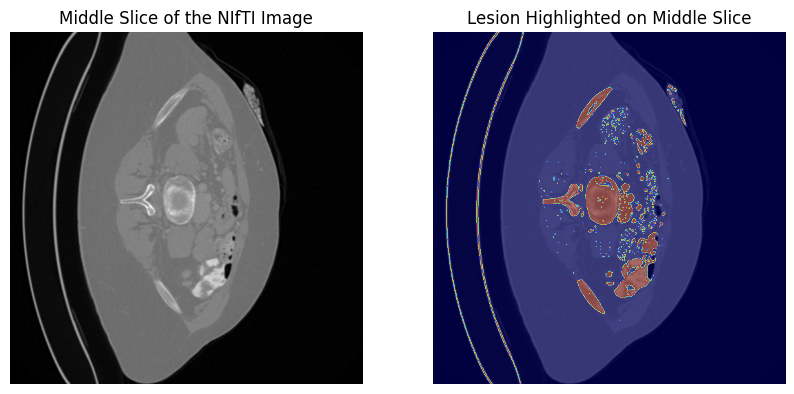

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Load a NIfTI file
nifti_file = nib.load('liver_25.nii')

# Access the image data as a NumPy array
image_data = nifti_file.get_fdata()

# Print some basic information about the image
print(f'Shape of the image data: {image_data.shape}')
print(f'Affine transformation matrix:\n{nifti_file.affine}')

# Perform some processing on the image data (example: thresholding to identify lesions)
threshold_value = 100  # This value may need adjustment based on the actual image intensity
lesion_data = image_data > threshold_value

# Label connected regions in the thresholded image
labeled_array, num_features = label(lesion_data)
print(f'Number of lesions detected: {num_features}')

# Plotting a slice of the image data with the lesion highlighted
slice_index = image_data.shape[2] // 2  # Take a slice from the middle of the volume
plt.figure(figsize=(10, 10))

# Display the original image slice
plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, slice_index], cmap='gray')
plt.title('Middle Slice of the NIfTI Image')
plt.axis('off')

# Display the lesion mask on the same slice
plt.subplot(1, 2, 2)
plt.imshow(image_data[:, :, slice_index], cmap='gray')
plt.imshow(lesion_data[:, :, slice_index], cmap='jet', alpha=0.5)  # Overlay the lesion in red
plt.title('Lesion Highlighted on Middle Slice')
plt.axis('off')

plt.show()

# Save the lesion mask as a new NIfTI image
lesion_nifti_file = nib.Nifti1Image(lesion_data.astype(np.uint8), nifti_file.affine)
nib.save(lesion_nifti_file, 'lesion_mask.nii')
